In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from model import LinearRegression
from loss import MeanSquaredError


DATA_PATH = "dnd_monsters.csv"


# Подготовка Датасета

In [53]:
df = pd.read_csv(DATA_PATH)
df["cr_float"] = df["cr"]
df["cr_float"] = df["cr_float"].replace('1/8', 0.125)
df["cr_float"] = df["cr_float"].replace('1/4', 0.25)
df["cr_float"] = df["cr_float"].replace('1/2', 0.5)
df["cr_float"] = df["cr_float"].astype('float')

df = df.dropna(subset=['dex'])


# Нормализация
for column in df.columns:
    if df[column].dtype == np.float64 or df[column].dtype == np.int64:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

df.describe()

,ac,hp,str,dex,con,int,wis,cha,cr_float
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,0.455486,0.119206,0.490756,0.435024,0.324870,0.292968,0.392818,0.313699,0.154832
std,0.158256,0.145289,0.223895,0.117910,0.199228,0.227771,0.123727,0.196440,0.197018
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350000,0.026667,0.344828,0.333333,0.181818,0.080000,0.320000,0.172414,0.016667
50%,0.400000,0.065185,0.517241,0.444444,0.272727,0.280000,0.400000,0.275862,0.066667
75%,0.600000,0.164444,0.620690,0.518519,0.409091,0.440000,0.440000,0.448276,0.200000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


cr_float    1.000000
hp          0.939353
con         0.849184
ac          0.745623
cha         0.708334
str         0.689633
int         0.631230
wis         0.584899
dex         0.015118
Name: cr_float, dtype: float64


<Axes: title={'center': 'Корреляция хитов со значением опасности'}, xlabel='hp', ylabel='cr_float'>

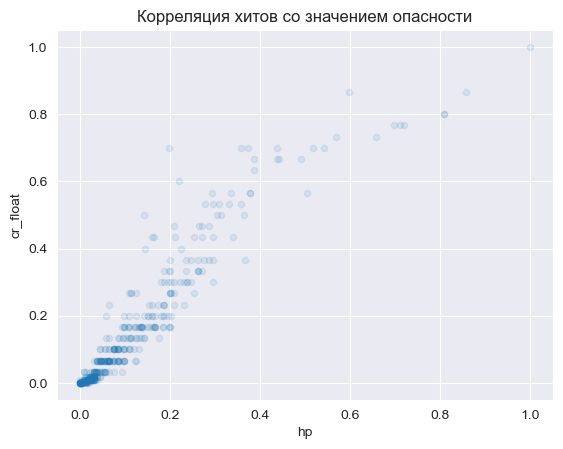

In [54]:
attributes = ["cr_float","hp", "con", "ac", "cha"]
corr_matrix = df.drop(["speed","cr", "name", "url", "legendary", "type", "size", "align", "source"], axis=1).corr()
print(corr_matrix["cr_float"].sort_values(ascending=False))
df.plot(kind='scatter', x='hp', y='cr_float', alpha=0.1, title="Корреляция хитов со значением опасности")

# Использование Реализованной Модели

In [55]:
just_x = np.asarray(df["hp"])
input_y = np.asarray(df["cr_float"])
mse = MeanSquaredError()

input_linear_x = just_x.reshape(-1, 1)
input_poly_x = (just_x ** np.arange(10).reshape(-1, 1)).transpose()

linear_gd_model = LinearRegression(epochs=10 ** 4, learning_rate=.01, batch_size=-1)
poly_gd_model = LinearRegression(epochs=10 ** 4, learning_rate=.1, batch_size=-1)

linear_bgd_model = LinearRegression(epochs=10 ** 4, learning_rate=.01, batch_size=10)
poly_bgd_model = LinearRegression(epochs=10 ** 4, learning_rate=.1, batch_size=10)

linear_sgd_model = LinearRegression(epochs=10 ** 4, learning_rate=.01, batch_size=1)
poly_sgd_model = LinearRegression(epochs=10 ** 4, learning_rate=.1, batch_size=1)

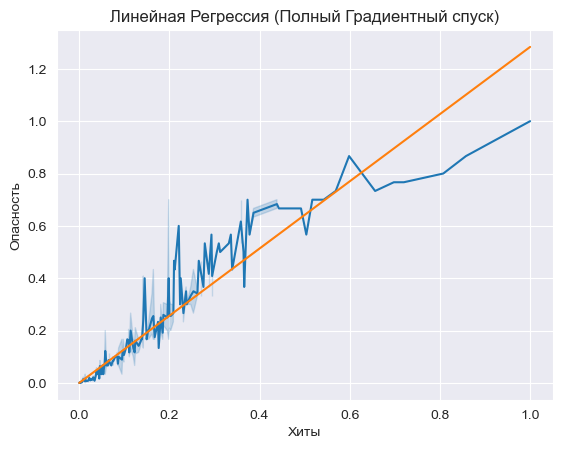

Mean Squared Error =  1.828301480919327


In [56]:
linear_gd_model.fit(input_linear_x, input_y, MeanSquaredError)
y_pred = linear_gd_model.predict(input_linear_x)
sns.lineplot(x=just_x, y=input_y)
sns.lineplot(x=just_x, y=y_pred)
plt.title("Линейная Регрессия (Полный Градиентный спуск)")
plt.xlabel("Хиты")
plt.ylabel("Опасность")
plt.show()
print("Mean Squared Error = ", mse(input_y, y_pred))

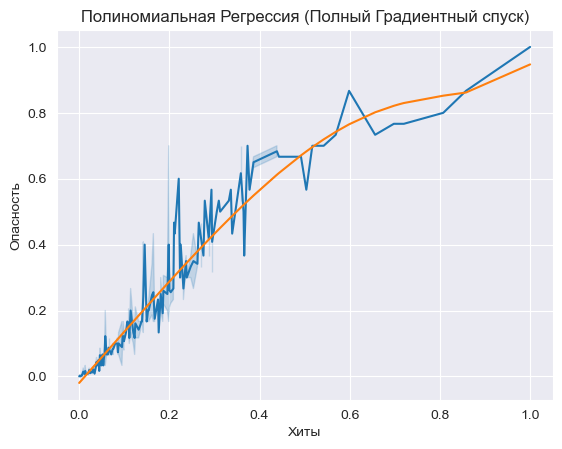

Mean Squared Error =  1.299342148939579


In [57]:
poly_gd_model.fit(input_poly_x, input_y, MeanSquaredError)
y_pred = poly_gd_model.predict(input_poly_x)
sns.lineplot(x=just_x, y=input_y)
sns.lineplot(x=just_x, y=y_pred)
plt.title("Полиномиальная Регрессия (Полный Градиентный спуск)")
plt.xlabel("Хиты")
plt.ylabel("Опасность")
plt.show()
print("Mean Squared Error = ", mse(input_y, y_pred))

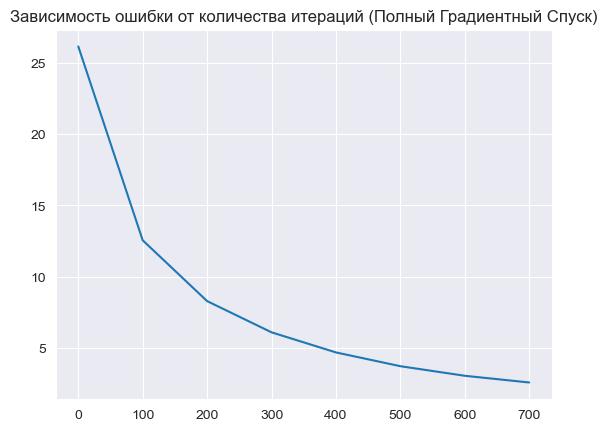

In [58]:
iterations_x = []
loss_y = []
poly_gd_model.weights = None
poly_gd_model.epochs = 100

for i in range(750):
    if i % 100 == 0:
        poly_gd_model.fit(input_poly_x, input_y, MeanSquaredError, weights=poly_gd_model.weights)
        iterations_x.append(i)
        loss_y.append(mse(input_y, poly_gd_model.predict(input_poly_x)))

sns.lineplot(x=iterations_x, y=loss_y)
plt.title("Зависимость ошибки от количества итераций (Полный Градиентный Спуск)")
plt.show()

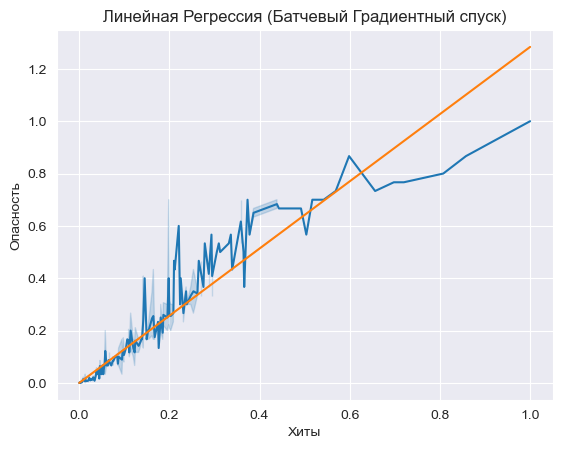

Mean Squared Error =  1.8283006941389321


In [59]:
linear_bgd_model.fit(input_linear_x, input_y, MeanSquaredError)
y_pred = linear_bgd_model.predict(input_linear_x)
sns.lineplot(x=just_x, y=input_y)
sns.lineplot(x=just_x, y=y_pred)
plt.title("Линейная Регрессия (Батчевый Градиентный спуск)")
plt.xlabel("Хиты")
plt.ylabel("Опасность")
plt.show()
print("Mean Squared Error = ", mse(input_y, y_pred))

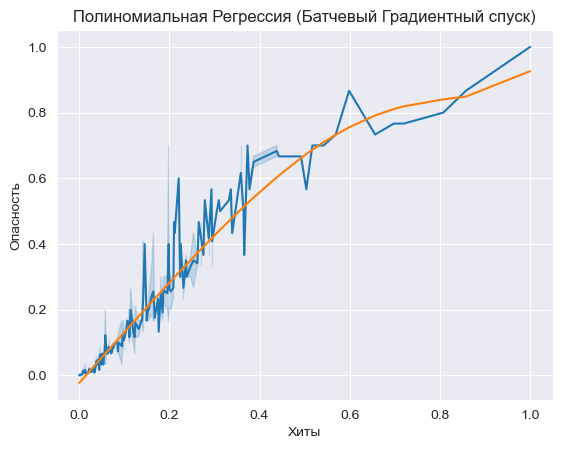

Mean Squared Error =  1.3110549046698878


In [60]:
poly_bgd_model.fit(input_poly_x, input_y, MeanSquaredError)
y_pred = poly_bgd_model.predict(input_poly_x)
sns.lineplot(x=just_x, y=input_y)
sns.lineplot(x=just_x, y=y_pred)
plt.title("Полиномиальная Регрессия (Батчевый Градиентный спуск)")
plt.xlabel("Хиты")
plt.ylabel("Опасность")
plt.show()
print("Mean Squared Error = ", mse(input_y, y_pred))

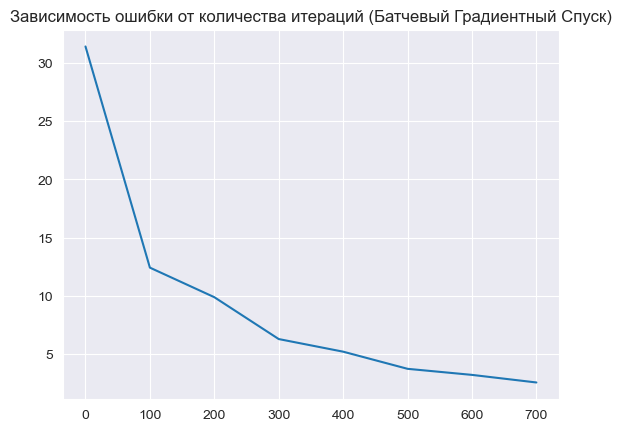

In [61]:
iterations_x = []
loss_y = []
poly_bgd_model.weights = None
poly_bgd_model.epochs = 100

for i in range(750):
    if i % 100 == 0:
        poly_bgd_model.fit(input_poly_x, input_y, MeanSquaredError, weights=poly_bgd_model.weights)
        iterations_x.append(i)
        loss_y.append(mse(input_y, poly_bgd_model.predict(input_poly_x)))

sns.lineplot(x=iterations_x, y=loss_y)
plt.title("Зависимость ошибки от количества итераций (Батчевый Градиентный Спуск)")
plt.show()

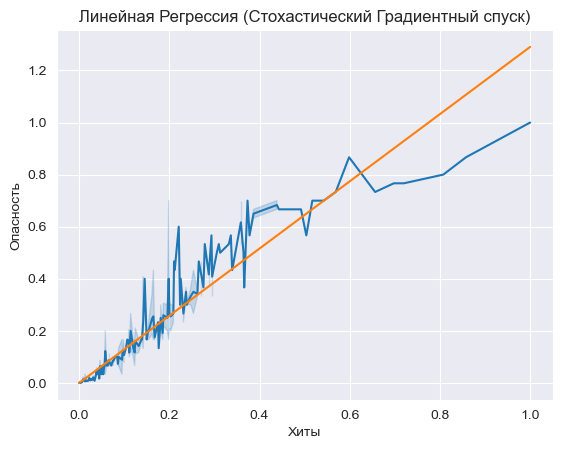

Mean Squared Error =  1.8289035183041287


In [62]:
linear_sgd_model.fit(input_linear_x, input_y, MeanSquaredError)
y_pred = linear_sgd_model.predict(input_linear_x)
sns.lineplot(x=just_x, y=input_y)
sns.lineplot(x=just_x, y=y_pred)
plt.title("Линейная Регрессия (Стохастический Градиентный спуск)")
plt.xlabel("Хиты")
plt.ylabel("Опасность")
plt.show()
print("Mean Squared Error = ", mse(input_y, y_pred))

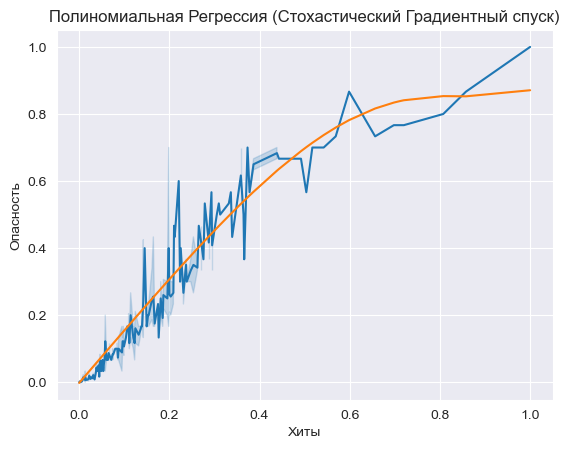

Mean Squared Error =  1.4447342683355404


In [63]:
poly_sgd_model.fit(input_poly_x, input_y, MeanSquaredError)
y_pred = poly_sgd_model.predict(input_poly_x)
sns.lineplot(x=just_x, y=input_y)
sns.lineplot(x=just_x, y=y_pred)
plt.title("Полиномиальная Регрессия (Стохастический Градиентный спуск)")
plt.xlabel("Хиты")
plt.ylabel("Опасность")
plt.show()
print("Mean Squared Error = ", mse(input_y, y_pred))

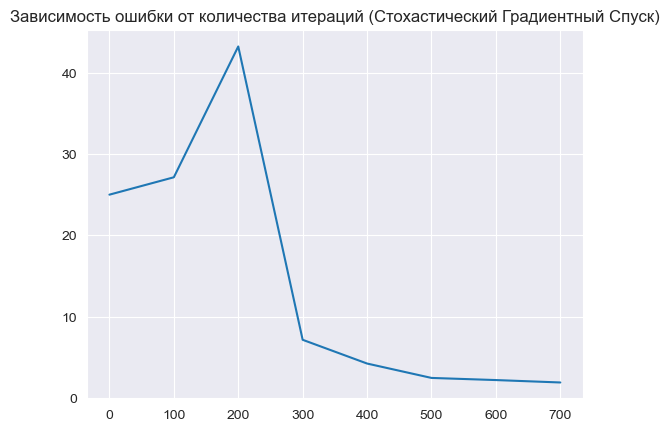

In [64]:
iterations_x = []
loss_y = []
poly_sgd_model.weights = None
poly_sgd_model.epochs = 100

for i in range(750):
    if i % 100 == 0:
        poly_sgd_model.fit(input_poly_x, input_y, MeanSquaredError, weights=poly_sgd_model.weights)
        iterations_x.append(i)
        loss_y.append(mse(input_y, poly_sgd_model.predict(input_poly_x)))

sns.lineplot(x=iterations_x, y=loss_y)
plt.title("Зависимость ошибки от количества итераций (Стохастический Градиентный Спуск)")
plt.show()